In [ ]:
# notebook submitted as solution to problemset 4 for the course Building a Robot Judge at ETHZ in spring 2019

In [42]:
%matplotlib notebook

In [2]:
import pickle  

# to load from saved pickle:
pkl_file = open("./p2_df_1k.20190418_1538.pkl", 'rb')
df = pickle.load(pkl_file)

# df3 has 1 label (rev/nonrev) and 1000 trigrams with last gram = a noun, could potentially be used to do classification
pkl3_file = open("./p2_df3_1k.20190418_1538.pkl", 'rb')
df3 = pickle.load(pkl3_file)

import numpy as np
import csv

import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from txt_utils import *

In [3]:
df3.head()

rev  v_unit_state  #_district_court  #_suprem_court  #_#_court  \
X3N6DO    0           0.0               0.0             0.0        0.0   
X3CEDR    0           0.0               0.0             0.0        0.0   
X3BD9F    0           0.0               0.0             0.0        0.0   
X3IJOI    0           0.0               0.0             0.0        0.0   
X3LJCS    0           0.0               0.0             0.0        0.0   

        #_unit_state  judgment_district_court  #_et_seq  state_district_court  \
X3N6DO           0.0                      0.0       0.0                   0.0   
X3CEDR           0.0                      0.0       0.0                   0.0   
X3BD9F           0.0                      0.0       0.0                   0.0   
X3IJOI           0.0                      0.0       0.0                   0.0   
X3LJCS           0.0                      0.0       0.0                   0.0   

        grant_summari_judgment  ...  nonnam_class_member  #_#_argument  \
X3N6DO                     0.0  ...                  0.0           0.0   
X3CEDR                     0.0  ...                  0.0           0.0   
X3BD9F                     0.0  ...                  0.0           0.0   
X3IJOI                     0.0  ...                  0.0           0.0   
X3LJCS                     0.0  ...                  0.0           0.0   

        unit_state_suit  #_fact_case  natur_gas_act  pass_constitut_muster  \
X3N6DO              0.0          0.0            0.0                    0.0   
X3CEDR              0.0          0.0            0.0                    0.0   
X3BD9F              0.0          0.0            0.0                    0.0   
X3IJOI              0.0          0.0            0.0                    0.0   
X3LJCS              0.0          0.0            0.0                    0.0   

        v_ftc_supra  depriv_due_process  feder_tax_law  #_#_employ  
X3N6DO          0.0                 0.0            0.0         0.0  
X3CEDR          0.0                 0.0            0.0         0.0  
X3BD9F          0.0                 0.0            0.0         0.0  
X3IJOI          0.0                 0.0            0.0         0.0  
X3LJCS          0.0                 0.0            0.0         0.0  

[5 rows x 1001 columns]

In [4]:
df3["state_district_court"].describe()

count    1000.000000
mean        0.232000
std         0.585251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: state_district_court, dtype: float64

In [5]:
df3["v_unit_state"].describe()

count    1000.000000
mean        1.066000
std         3.126887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        37.000000
Name: v_unit_state, dtype: float64

In [8]:
dff_fname = open("./p4_df_1k.20190613_005107.pkl", 'rb') # see separate jupyter notebook for generating this pickle
dff = pickle.load(dff_fname)

In [9]:
dff.head()

case_reversed  judge_id    year  x_republican  log_cites  \
caseid                                                             
X53OBB              0    1641.0  1989.0           1.0   2.639057   
X3UGPI              0    1421.0  1981.0           1.0   2.772589   
X46BHQ              0     367.0  1988.0           0.0   4.043051   
X46C0P              0     751.0  1989.0           1.0   2.772589   
XABC47              1    2035.0  1979.0           0.0   2.397895   

                                                      doc  jahr    nlets  \
caseid                                                                     
X53OBB   PIERCE , Circuit Judge: The Government of Ind...  1989  15514.0   
X3UGPI   MESKILL , Circuit Judge: This is an appeal fr...  1981  18260.0   
X46BHQ   CLARK , Circuit Judge: In another chapter of ...  1988  54172.0   
X46C0P   D.H.\nGINSBURG , Circuit Judge: This appeal a...  1989  28840.0   
XABC47   TANG , Circuit Judge.\nStandard Oil Company o...  1979  16334.0   

        nsents  nwords  nnouns  nverbs  nadjes  
caseid                                          
X53OBB   108.0  2641.0   864.0   387.0    89.0  
X3UGPI   112.0  2979.0   951.0   395.0   214.0  
X46BHQ   439.0  9210.0  2938.0  1247.0   538.0  
X46C0P   179.0  4811.0  1527.0   655.0   277.0  
XABC47   141.0  2787.0   887.0   394.0   153.0

In [10]:
len(dff)

1000

In [11]:
dff["log_cites"].describe()

count    1000.000000
mean        2.118470
std         0.928693
min         0.693147
25%         1.386294
50%         2.079442
75%         2.833213
max         4.927254
Name: log_cites, dtype: float64

In [12]:
dff["x_republican"].describe()

count    1000.000000
mean        0.494000
std         0.500214
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: x_republican, dtype: float64

In [13]:
X = dff.loc[: , ["log_cites", "judge_id","jahr", "x_republican", "nsents", "nwords", "nlets", "nnouns", "nverbs", "nadjes"]]

#for inde in dff.index:
#    log_cites = np.ceil(np.exp(dff.loc[inde, "log_cites"]) - 1)
#    dff.at[inde, "citeCounts"] = log_cites
Y = dff["case_reversed"]


In [14]:
len(X)

1000

In [15]:
Y.head(15)

caseid
X53OBB    0
X3UGPI    0
X46BHQ    0
X46C0P    0
XABC47    1
X3SSDU    1
XAFG1C    1
XABG48    1
X3I632    1
X3UPA9    1
X47RS2    0
X3TJ7T    1
X31UV5    1
X3PO3D    0
XACCQ4    1
Name: case_reversed, dtype: int64

In [16]:
X.head()

log_cites  judge_id  jahr  x_republican  nsents  nwords    nlets  \
caseid                                                                     
X53OBB   2.639057    1641.0  1989           1.0   108.0  2641.0  15514.0   
X3UGPI   2.772589    1421.0  1981           1.0   112.0  2979.0  18260.0   
X46BHQ   4.043051     367.0  1988           0.0   439.0  9210.0  54172.0   
X46C0P   2.772589     751.0  1989           1.0   179.0  4811.0  28840.0   
XABC47   2.397895    2035.0  1979           0.0   141.0  2787.0  16334.0   

        nnouns  nverbs  nadjes  
caseid                          
X53OBB   864.0   387.0    89.0  
X3UGPI   951.0   395.0   214.0  
X46BHQ  2938.0  1247.0   538.0  
X46C0P  1527.0   655.0   277.0  
XABC47   887.0   394.0   153.0

In [17]:
X["jahr"] = X["jahr"].astype(int)

In [18]:
X.dtypes

log_cites       float64
judge_id        float64
jahr              int64
x_republican    float64
nsents          float64
nwords          float64
nlets           float64
nnouns          float64
nverbs          float64
nadjes          float64
dtype: object

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier()
gbclf.fit(X, Y)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [20]:
ypred = gbclf.predict_proba(X)[:,1]



<IPython.core.display.Javascript object>


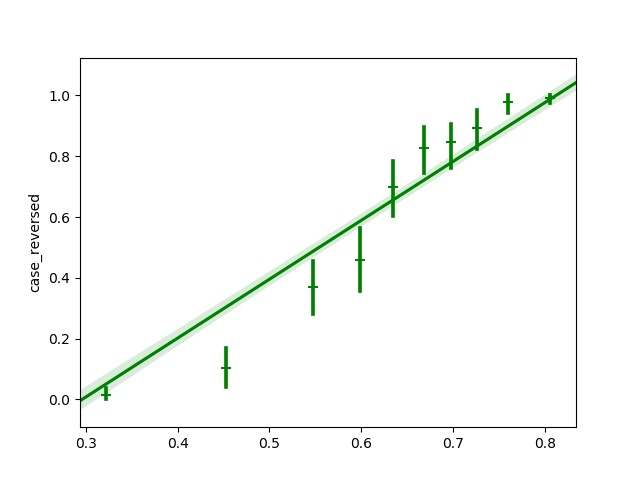

In [21]:
import seaborn as sns
plot = sns.regplot(ypred, Y, color = 'g', marker = '+', x_bins = 10)
plt.show()

# Permutation importances with ELI5


In [22]:
import eli5
from sklearn.metrics import mean_squared_error, make_scorer
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gbclf, random_state=1).fit(X,Y)
eli5.show_weights(perm, feature_names = list(X.columns))


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234)

### <font color='blue' > Feature Importance </font>

In [24]:
# see savvastsortjoglou.com/interpretable-machine-learning-nfl-combine.html 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import  cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor

from skll.metrics import spearman

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import warnings

In [25]:
RANDOM_STATE=1234
N_JOBS=8
# the modeling pipeline
pipe = Pipeline([("imputer", Imputer()),
                 ("estimator", RandomForestRegressor(random_state=RANDOM_STATE))])


/home/xhta/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
spearman_scorer = make_scorer(spearman)
# the hyperparamters to search over, including different imputation strategies
rf_param_space = {
    'imputer__strategy': Categorical(['mean', 'median', 'most_frequent']),
    'estimator__max_features': Integer(1, 5),   # was Integer(1, 8),
    'estimator__n_estimators': Integer(50, 60),    # was Integer(50, 500)
    'estimator__min_samples_split': Integer(70, 85),  # was Integer(2, 200)
}
# create our search object
search = BayesSearchCV(pipe, 
                      rf_param_space, 
                      cv=10,
                      n_jobs=N_JOBS, 
                      verbose=0, 
                      error_score=-9999, 
                      scoring=spearman_scorer, 
                      random_state=RANDOM_STATE,
                      return_train_score=True, 
                      n_iter=75)

In [27]:
# attention, search can take some time
import time
start_time = time.time()
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    search.fit(X_train, Y_train) 
print (time.time() - start_time)

314.9102966785431


In [29]:
search.best_params_

{'estimator__max_features': 2,
 'estimator__min_samples_split': 77,
 'estimator__n_estimators': 50,
 'imputer__strategy': 'median'}

In [30]:
# CV score
search.best_score_

0.11712952086074066

In [31]:
# CV standard deviation
search.cv_results_['std_test_score'][search.best_index_]

0.09807688772016362

In [32]:
estimator = search.best_estimator_.named_steps['estimator']
imputer = search.best_estimator_.named_steps['imputer']

estimator.feature_importances_

array([0.14137685, 0.11828633, 0.1958735 , 0.01701467, 0.07693439,
       0.07352204, 0.09844742, 0.09854429, 0.10300105, 0.07699945])

<IPython.core.display.Javascript object>


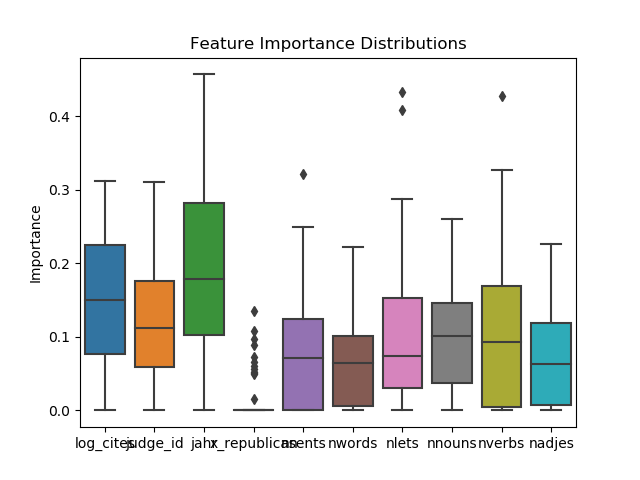

In [33]:

# get the feature importances from each tree and then visualize the
# distributions as boxplots
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     estimator],
                               columns=list(X.columns))

(sns.boxplot(data=all_feat_imp_df)
        .set(title='Feature Importance Distributions',
             ylabel='Importance'))
plt.show()

In [33]:
# see https://nbviewer.jupyter.org/github/dipanjanS/data_science_for_all/blob/master/tds_model_interpretation_xai/Human_interpretable%20Machine%Learning%20-%20DS.ipynb#

In [34]:
%%time
import xgboost as xgb
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, best_score=0.5, objective='binary:logistic', random_state=1234)

CPU times: user 450 µs, sys: 0 ns, total: 450 µs
Wall time: 5.2 ms


In [35]:
xgc.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, best_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=1234,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [36]:
X_train.dtypes

log_cites       float64
judge_id        float64
jahr              int64
x_republican    float64
nsents          float64
nwords          float64
nlets           float64
nnouns          float64
nverbs          float64
nadjes          float64
dtype: object

In [37]:
pred = xgc.predict(X_test)

In [38]:
pred[0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [39]:
Y_test[0:10]

caseid
X369VS        1
X40G3F        1
X1B6SUE003    0
X3P7L9        1
X46H9S        0
X3AE83        0
X2O2SC        0
X41U1F        1
X3J6BO        0
X12DAOQ003    0
Name: case_reversed, dtype: int64

<IPython.core.display.Javascript object>


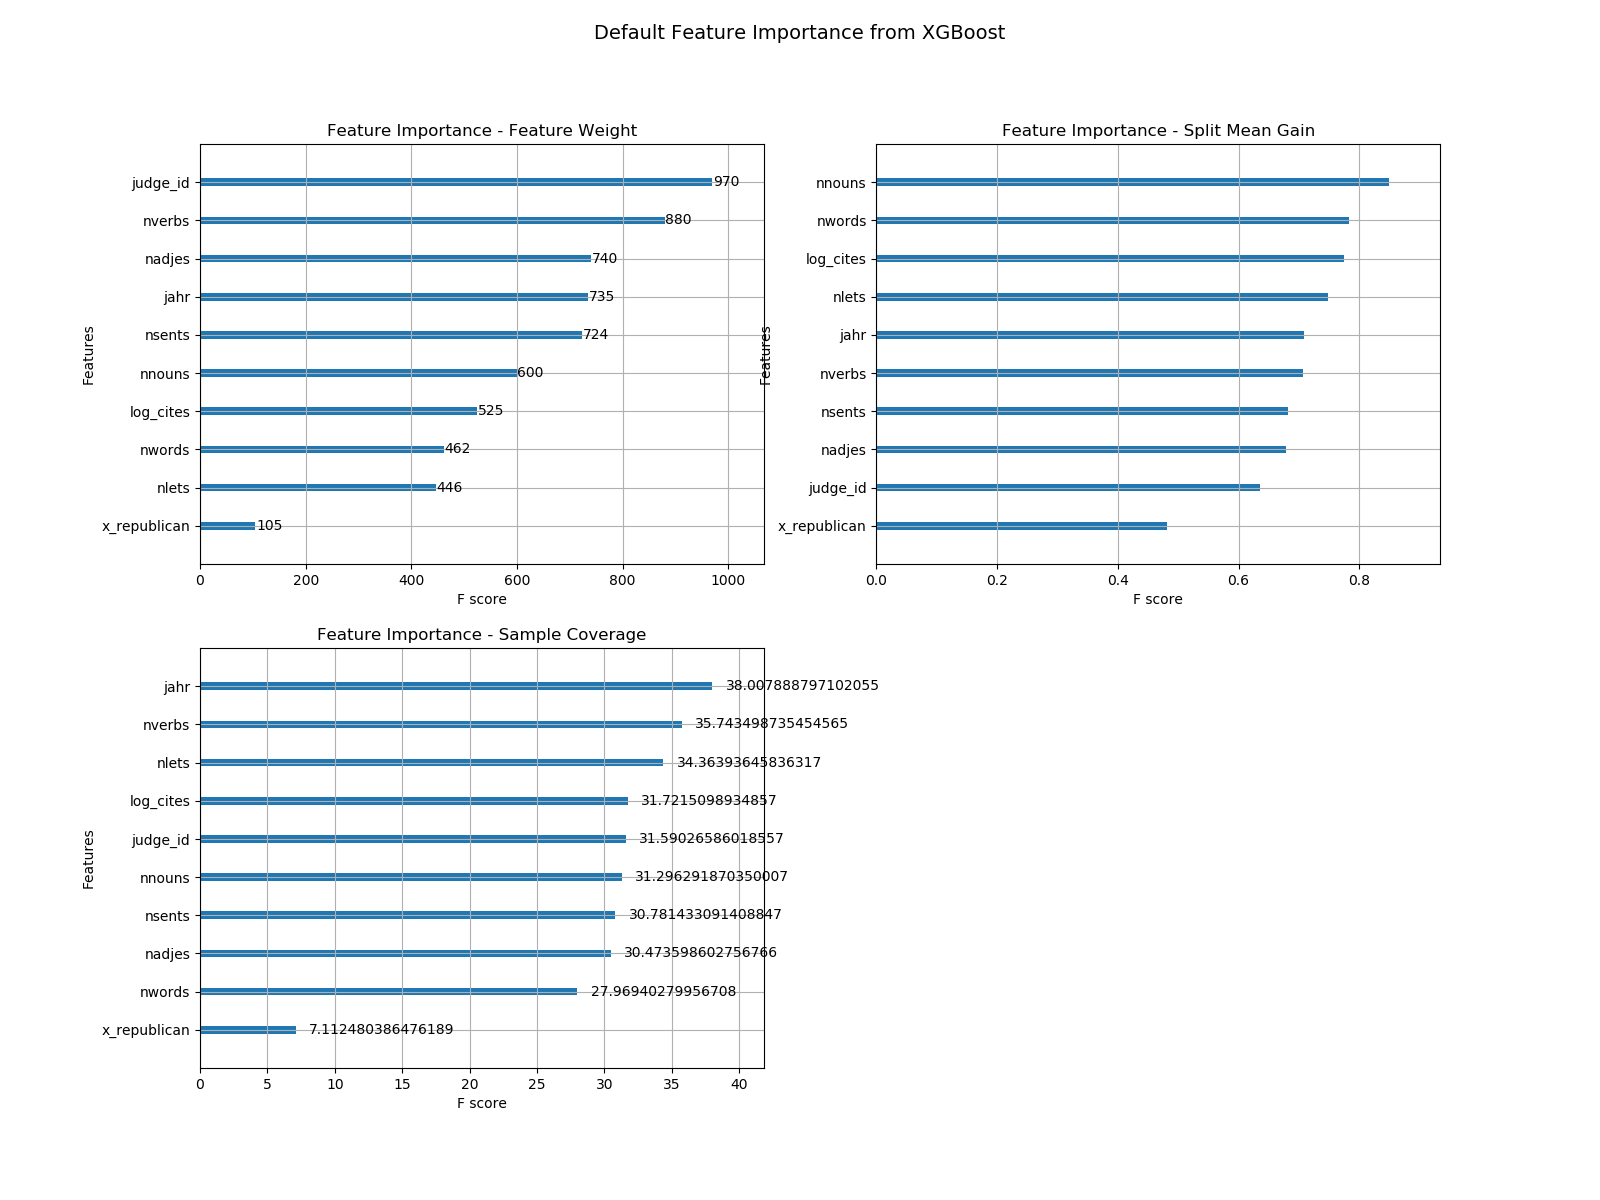

In [43]:
fig = plt.figure(figsize  = (16,12))
title = fig.suptitle("Default Feature Importance from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2,1)
xgb.plot_importance(xgc, importance_type = 'weight', ax = ax1)
t = ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2,2)
xgb.plot_importance(xgc, importance_type = 'gain', ax = ax2)
t = ax2.set_title("Feature Importance - Split Mean Gain")
                      
ax3 = fig.add_subplot(2,2,3)
xgb.plot_importance(xgc, importance_type = 'cover', ax = ax3)
t = ax3.set_title("Feature Importance - Sample Coverage")

# feature importances with ELI5

In [44]:
eli5.show_weights(xgc.get_booster())

# Global interpretation with Skater

In [45]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [46]:
#Create an interpretation object

In [47]:
interpreter = Interpretation(training_data=X_test, training_labels=Y_test, feature_names=list(X.columns))
im_model = InMemoryModel(xgc.predict_proba, examples=X_train, target_names=['not reverted', 'reverted'])

2019-06-13 02:07:09,470 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[10/10] features ████████████████████ Time elapsed: 3 seconds

<IPython.core.display.Javascript object>


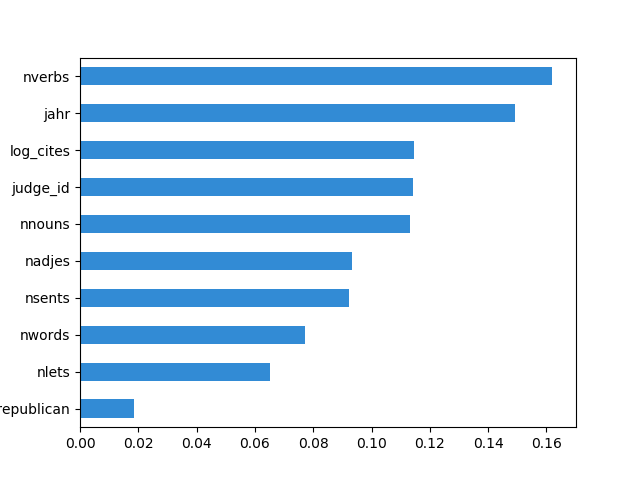

In [48]:

plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True, n_samples=1000)

# Local interpretation with Skater  LIME


In [49]:
xgc_np = xgb.XGBClassifier(n_estimators=500, map_depth=5, base_score=0.5, objective = 'binary:logistic', random_state=1234)
xgc_np.fit(X_train.values, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       map_depth=5, max_delta_step=0, max_depth=3, min_child_weight=1,
       missing=None, n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=1234, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [50]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
exp = LimeTabularExplainer(X_test, feature_names= list(X.columns), discretize_continuous = False, class_names=['not reverted', 'reverted'])

In [51]:
print('Actual Label:', Y_test[0])
print('Predicted Label:', pred[0])
exp.explain_instance(X_train.loc[0], xgc_np.predict_proba).show_in_notebook()

Actual Label: 1
Predicted Label: 1


In [52]:
pred[0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [53]:
print('Actual Label:', Y_test[2])
print('Predicted Label:', pred[2])
exp.explain_instance(X_train.loc[2], xgc_np.predict_proba).show_in_notebook()

Actual Label: 0
Predicted Label: 1


In [54]:
#using Tree surrogate
surrogate_explainer = interpreter.tree_surrogate(oracle=im_model, seed=1234)

In [55]:
surrogate_explainer.fit(X_train, Y_train)

2019-06-13 02:07:46,191 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2019-06-13 02:07:46,223 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used cross-entropy
2019-06-13 02:07:46,231 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 9.992007221626413e-16
2019-06-13 02:07:47,031 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [2, 3, 11]
2019-06-13 02:07:47,041 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (700, 2)
2019-06-13 02:07:47,050 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.009; oracle score 0.062
2019-06-13 02:07:47,061 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.053 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score,

0.053

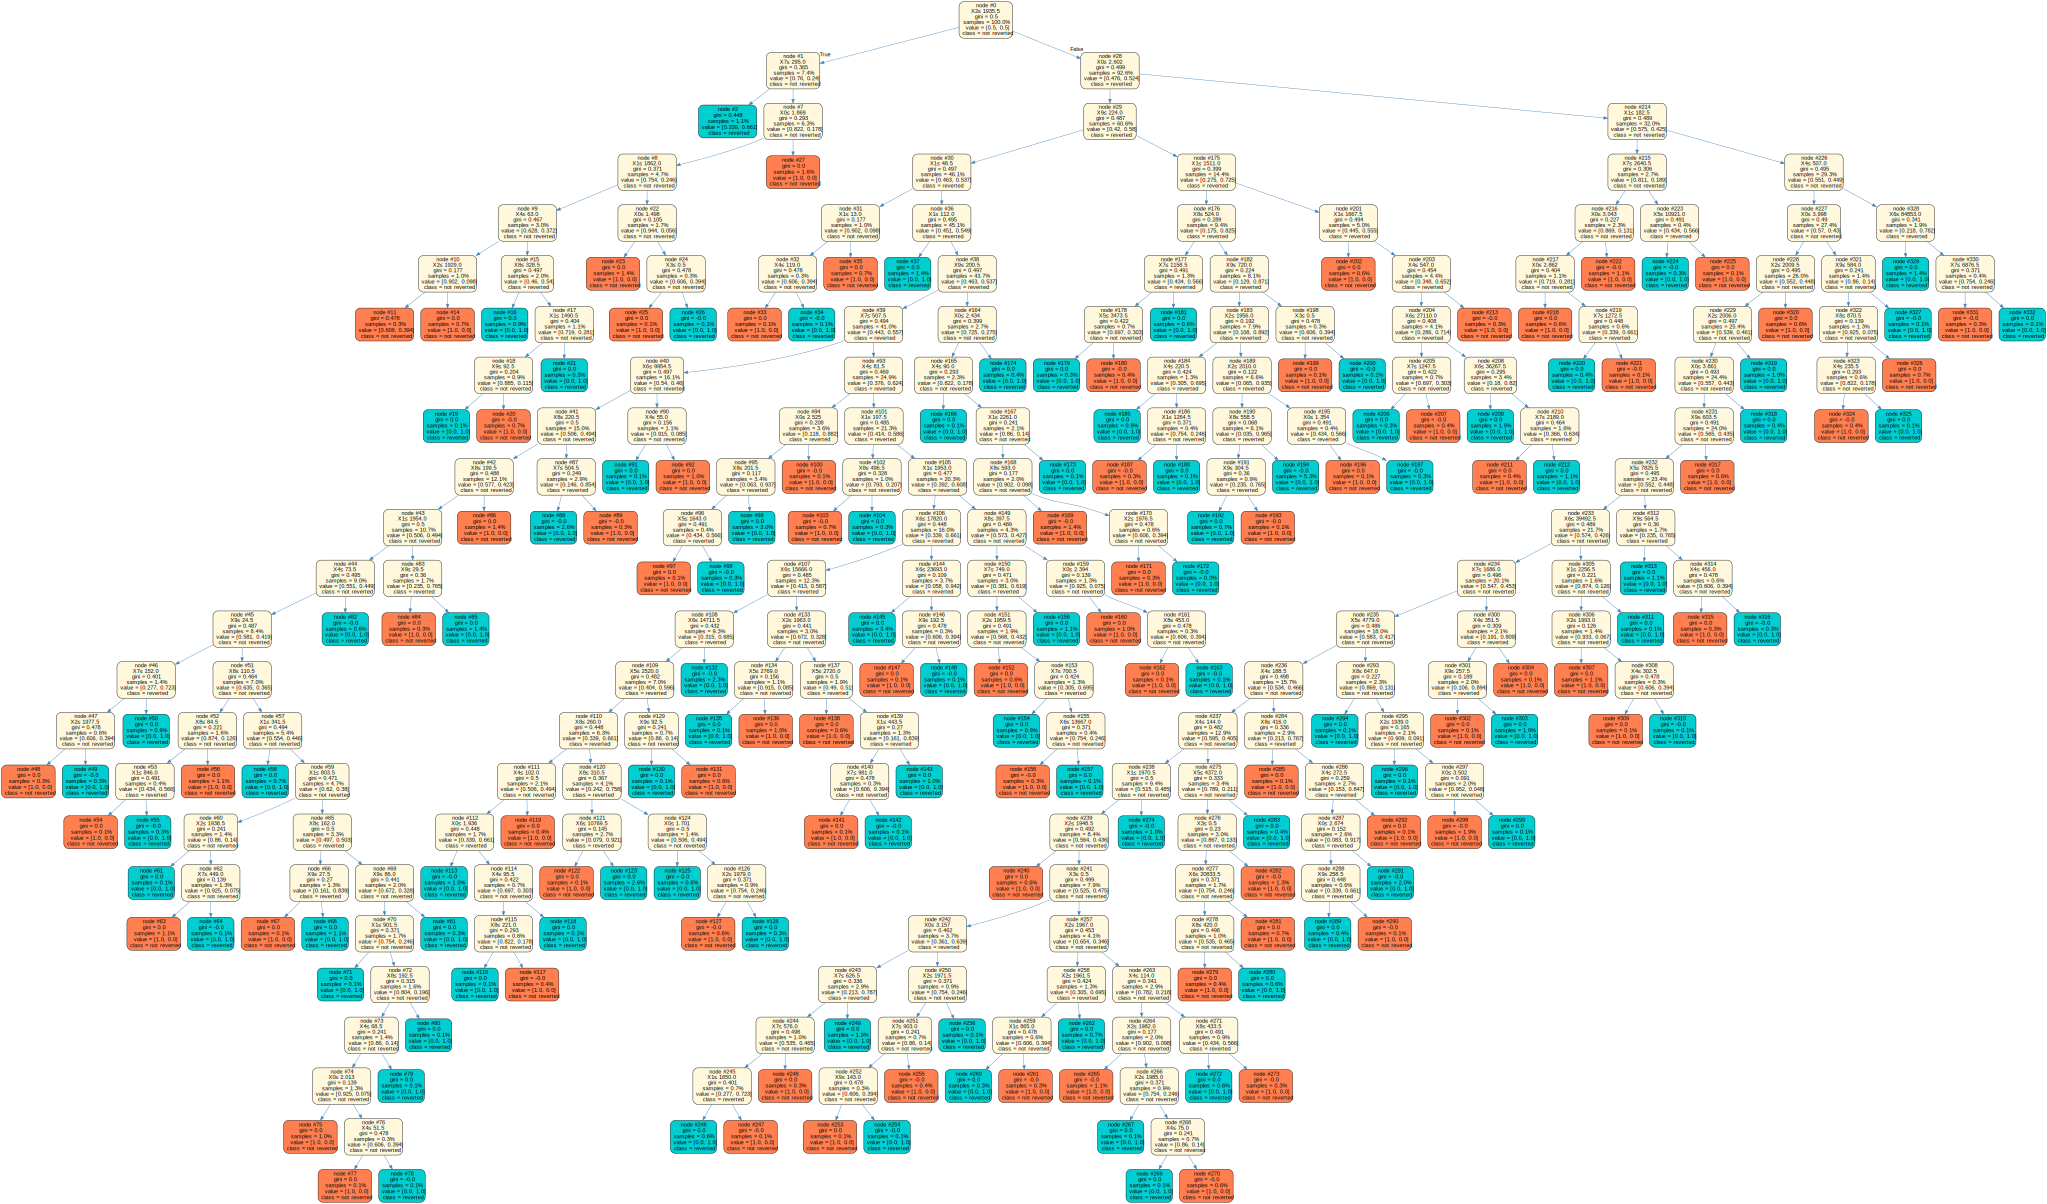

In [56]:
from skater.util.dataops import show_in_notebook
from graphviz import Source
from IPython.display import SVG

graph = Source (surrogate_explainer.plot_global_decisions(colors=['coral', 'darkturquoise'], file_name='p4a.png' ).to_string())
svg_data = graph.pipe(format='svg')
with open ('dtree.svg', 'wb') as f:
    f.write(svg_data)
SVG(svg_data)

# Global Surrogate

In [57]:
# use X_train and xgc's prediction to train a LogisticClassifier
from sklearn.linear_model import LogisticRegression
gsur_log = LogisticRegression(C=1e5)

In [58]:
# get  y^ = output of xgc if fed with X_train
yhat = xgc.predict(X_train)


In [59]:
gsur_log.fit(X_train.values, yhat)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [60]:
yhathat = gsur_log.predict(X_test)

In [61]:
len(yhathat)

300

In [62]:
yhathat[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
pred[0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yhathat, pred)

array([[  9,   4],
       [ 92, 195]])

In [65]:
(195+9)/300

0.68

# TextExplainer

In [66]:
import pickle
pkl_file = open("/home/xhta/Robot/problemsets/prob4/p4_df_1k.20190613_005107.pkl", "rb")
p4_df = pickle.load(pkl_file)

In [67]:
p4_df.head()

case_reversed  judge_id    year  x_republican  log_cites  \
caseid                                                             
X53OBB              0    1641.0  1989.0           1.0   2.639057   
X3UGPI              0    1421.0  1981.0           1.0   2.772589   
X46BHQ              0     367.0  1988.0           0.0   4.043051   
X46C0P              0     751.0  1989.0           1.0   2.772589   
XABC47              1    2035.0  1979.0           0.0   2.397895   

                                                      doc  jahr    nlets  \
caseid                                                                     
X53OBB   PIERCE , Circuit Judge: The Government of Ind...  1989  15514.0   
X3UGPI   MESKILL , Circuit Judge: This is an appeal fr...  1981  18260.0   
X46BHQ   CLARK , Circuit Judge: In another chapter of ...  1988  54172.0   
X46C0P   D.H.\nGINSBURG , Circuit Judge: This appeal a...  1989  28840.0   
XABC47   TANG , Circuit Judge.\nStandard Oil Company o...  1979  16334.0   

        nsents  nwords  nnouns  nverbs  nadjes  
caseid                                          
X53OBB   108.0  2641.0   864.0   387.0    89.0  
X3UGPI   112.0  2979.0   951.0   395.0   214.0  
X46BHQ   439.0  9210.0  2938.0  1247.0   538.0  
X46C0P   179.0  4811.0  1527.0   655.0   277.0  
XABC47   141.0  2787.0   887.0   394.0   153.0

In [68]:
p4_df.shape

(1000, 13)

In [69]:
p4_df = p4_df.dropna()

In [70]:
#Xt = p4_df.loc[:, "judge_id":"nadjes"]
#Yt = p4_df.loc[:, "case_reversed"]
Xt = p4_df.loc[:, ["judge_id", "log_cites", "doc", "jahr", "nlets", "nsents", "nwords", "nnouns", "nverbs", "nadjes"]]
Yt = p4_df.loc[:, "x_republican"]

In [71]:
Xt_train, Xt_test,  Yt_train, Yt_test = train_test_split(Xt, Yt, test_size = 0.3, random_state = 1234)

In [72]:
Xt_train.shape, Yt_train.shape

((700, 10), (700,))

In [73]:
Xt_train.head()

judge_id  log_cites  \
caseid                        
X3CQCM    1814.0   1.791759   
X40SFF    1990.0   1.098612   
X3ILN5     644.0   1.791759   
X3PAGN    1112.0   0.693147   
X6CQBP    1598.0   3.610918   

                                                      doc  jahr    nlets  \
caseid                                                                     
X3CQCM   SANBORN , Circuit Judge.\nThis action, which ...  1950   9426.0   
X40SFF   STEPHENS , Circuit Judge.\nAnne Johnson is ap...  1947   6692.0   
X3ILN5   FERNANDEZ , Circuit Judge: Robert Elmer Hyde ...  1996   3666.0   
X3PAGN   CORNELIA G. KENNEDY , Circuit Judge.\nOhio re...  1981  45083.0   
X6CQBP   B.D.\nPARKER, Jr., Circuit Judge.\nThis case,...  2003  84348.0   

        nsents   nwords  nnouns  nverbs  nadjes  
caseid                                           
X3CQCM    62.0   1690.0   520.0   241.0    64.0  
X40SFF    55.0   1169.0   338.0   184.0    66.0  
X3ILN5    53.0    665.0   208.0    96.0    24.0  
X3PAGN   329.0   7570.0  2261.0   990.0   579.0  
X6CQBP   705.0  14270.0  4660.0  1733.0   941.0

In [74]:
Yt_train.head()

caseid
X3CQCM    1.0
X40SFF    0.0
X3ILN5    1.0
X3PAGN    0.0
X6CQBP    1.0
Name: x_republican, dtype: float64

In [75]:
Yt_test[0:5]

caseid
X369VS        1.0
X40G3F        0.0
X1B6SUE003    0.0
X3P7L9        1.0
X46H9S        1.0
Name: x_republican, dtype: float64

In [76]:
# source : github TeamHG-Memex  TextExplainer.ipynb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline

vec = TfidfVectorizer(min_df = 1, max_df = 4, stop_words = 'english', ngram_range = (1,3))
svd = TruncatedSVD(n_components=11, n_iter = 5, random_state=1234)
lsa = make_pipeline(vec, svd)

svcclf = SVC(C=100, gamma = 1e-2, probability=True)
pipe = make_pipeline(lsa, svcclf)
pipe.fit(Xt_train["doc"].values.tolist(), Yt_train.values.tolist())
pipe.score(Xt_test["doc"].values.tolist(), Yt_test.values.tolist())

0.5133333333333333

In [322]:
type(Xt_train)

pandas.core.frame.DataFrame

In [77]:
type(Xt_train["doc"])

pandas.core.series.Series

In [78]:
type(Yt_train)

pandas.core.series.Series

In [79]:
Yt_test[0:5]

caseid
X369VS        1.0
X40G3F        0.0
X1B6SUE003    0.0
X3P7L9        1.0
X46H9S        1.0
Name: x_republican, dtype: float64

In [80]:
type(Xt_train["doc"].values.tolist())

list

In [81]:
def print_prediction(doc):
    y_pred = pipe.predict_proba([doc])[0]
    for target, prob in zip(['democrat', 'republican'], y_pred):
        print("{:.3f} {}".format(prob, target))    

doclist=Xt_test["doc"].values.tolist()
doc = doclist[0]
print_prediction(doc)

0.467 democrat
0.533 republican


In [84]:
import eli5
from eli5.lime import TextExplainer

te = TextExplainer(random_state=1234)
te.fit(doc, pipe.predict_proba)
te.show_prediction(target_names=['democrat', 'republican'])

#### metrrics_ 
shows the quality of the surrogate model. 
'score' indicates the accuracy weighted by
the cosine distance between generated sample and the original document. The higher the better
'mean_KL_divergence' : mean over all target classes. KL show how well probabilities are approximated: 0.0 means a perfect match

In [90]:
te.metrics_

{'mean_KL_divergence': 0.17909169690334967, 'score': 0.11217143196344301}

In [89]:
te.fit(Xt_train["doc"].values.tolist()[1], pipe.predict_proba)
te.show_prediction(target_names=['democrat','republican'])  # column x_republican = 0 for democrat and = 1 for republican

In [87]:
te.metrics_

{'mean_KL_divergence': 0.1660828903609619, 'score': 0.1067110836233576}

In [97]:
te.fit(Xt_train["doc"].values.tolist()[7], pipe.predict_proba)
te.metrics_

{'mean_KL_divergence': 0.13647336446015787, 'score': 0.338589334084546}

In [ ]:
# using min_df = 2  instead of 1  and ngram_range = (2,3)  and gamma = 1e-4 instead of 1e-2 in SVCClassifier:

In [98]:
# source : github TeamHG-Memex  TextExplainer.ipynb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline

vec = TfidfVectorizer(min_df = 2, max_df = 4, stop_words = 'english', ngram_range = (2,3))
svd = TruncatedSVD(n_components=11, n_iter = 5, random_state=1234)
lsa = make_pipeline(vec, svd)

svcclf = SVC(C=100, gamma = 1e-4, probability=True)
pipe = make_pipeline(lsa, svcclf)
pipe.fit(Xt_train["doc"].values.tolist(), Yt_train.values.tolist())
pipe.score(Xt_test["doc"].values.tolist(), Yt_test.values.tolist())

0.5133333333333333

In [99]:
te = TextExplainer(random_state=1234)
te.fit(doc, pipe.predict_proba)
te.show_prediction(target_names=['democrat', 'republican'])
te.metrics_

{'mean_KL_divergence': 3.9849186347704486, 'score': 0.7893171128892489}

In [100]:
te = TextExplainer(random_state=1234)
te.fit(Xt_train["doc"].values.tolist()[0], pipe.predict_proba)
te.show_prediction(target_names=['democrat', 'republican'])
te.metrics_

{'mean_KL_divergence': 1.2364966024527837, 'score': 0.058939661735066595}

In [101]:
te = TextExplainer(random_state=1234)
te.fit(Xt_train["doc"].values.tolist()[1], pipe.predict_proba)
te.show_prediction(target_names=['democrat', 'republican'])
te.metrics_

{'mean_KL_divergence': 0.057575538892662245, 'score': 0.3686694379535143}

In [102]:
te = TextExplainer(random_state=1234)
te.fit(Xt_train["doc"].values.tolist()[2], pipe.predict_proba)
te.show_prediction(target_names=['democrat', 'republican'])
te.metrics_

{'mean_KL_divergence': 0.027043167920026315, 'score': 0.8025921018252219}

In [103]:
te = TextExplainer(random_state=1234)
te.fit(Xt_train["doc"].values.tolist()[4], pipe.predict_proba)
te.show_prediction(target_names=['democrat', 'republican'])
te.metrics_

{'mean_KL_divergence': 8.761650710238545, 'score': 0.9664562083867334}

# better metrics should be achievable by applying a GridSearchCV  to look for best parameters for the TfIdfvectorizer and the SVD Classifier